In [0]:
!nvidia-smi
!pip install torchvision==0.2.2
!pip install torch==0.4.1 -f https://download.pytorch.org/whl/cu92/stable

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

Looking in links: https://download.pytorch.org/whl/cu92/stable


In [0]:
# Imported the necessary libraries 

import numpy as np
import os
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
from torch import optim
from google.colab import drive
from torch.autograd import Variable

%matplotlib inline 

In [0]:


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

170500096it [00:04, 40731313.03it/s]                               


Files already downloaded and verified


In [0]:
img, lab = trainset.__getitem__(0)
print(type(img))
print(type(lab))

<class 'torch.Tensor'>
<class 'int'>


torch.Size([3, 32, 32])


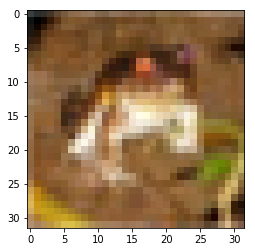

In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Print a sample image 
# Use our imshow function and iterators
# (Approx 5 - 10 lines of code)

### START CODE ### 
print(trainset[0][0].size())
show_img = trainset[0][0].reshape(3,32, 32)
imshow(show_img)
###  END CODE  ###

In [0]:
input_size = 3072
hidden_sizes = [512 , 128,64]
output_size = 10


### START CODE ###
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 3072 --> 512
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 512 --> 128
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        # Linear function 3: 128 --> 64
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        # Non-linearity 3
        self.relu3 = nn.ReLU()
        
        # Linear function 4 (readout): 64 --> 10
        self.fc4 = nn.Linear(hidden_sizes[2], output_size)
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
         # Linear function 3
        out = self.fc3(out)
        # Non-linearity 3
        out = self.relu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
      
model = FeedforwardNeuralNetModel(input_size, hidden_sizes, output_size)
###  END CODE  ###

In [0]:


### START CODE ###
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

###  END CODE  ###

In [0]:
epochs = 15



### START CODE ###
for epoch in range(epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Load images as Variable
       # print(images.shape[0])
        images = Variable(images.view(images.shape[0],-1))
       
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
###  END CODE  ###

In [0]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'goodmodel.pkl')

load_model = True
if load_model is True:
    model.load_state_dict(torch.load('goodmodel.pkl'))

In [0]:


### START CODE ###
 # Calculate Accuarcy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in testloader:
                # Load images to a Torch Variable
                images = Variable(images.view(-1, 3*32*32))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))
###  END CODE  ###

Iteration: <built-in function iter>. Loss: 1.726965308189392. Accuracy: 54


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [0]:
from google.colab import files
files.download('goodmodel.pkl')